# Geographic Explorer

Notebook to import and combine geographic datasets, starting with the smallest level of analysis that we have complete data for: voting precincts.

Note: datasets and shapefiles must be available locally - if not available, run ETL code.

## User Input

In [22]:
state = '48'
county_or_counties = [29]
year = '22'
election_type = 'g'

### Pre-ETL and Data Prep

In [3]:
import geopandas as gpd

## ETL

### Loading Texas Legislative Council Data

#### Voting Precinct Data

In [12]:
TLC_shapefiles_dirpath = f'data/geospatial_files/shapefiles/texas_legislative_council/20{year}/'
TLC_shapefiles_filepath = f'VTDs_{year}{election_type.upper()}'
TLC_gdf = gpd.read_file(TLC_shapefiles_dirpath + TLC_shapefiles_filepath + '.shp').set_crs(epsg=3395)

In [14]:
for county in county_or_counties:
    TLC_gdf = TLC_gdf[TLC_gdf['CNTY'] == county]
TLC_gdf.head()

,CNTY,COLOR,VTD,CNTYKEY,VTDKEY,CNTYVTD,Shape_area,Shape_len,geometry
248,29,7,1002,15,252.0,291002,3.931453e+05,2767.912893,"POLYGON ((1127317.181 808422.762, 1127254.531 ..."
249,29,1,1003,15,253.0,291003,2.204971e+06,6923.592336,"POLYGON ((1145785.821 806705.122, 1145781.822 ..."
250,29,2,1004,15,254.0,291004,1.650327e+06,5641.228836,"POLYGON ((1146409.144 803755.848, 1146384.195 ..."
251,29,1,1005,15,255.0,291005,8.478414e+05,4453.396699,"POLYGON ((1144737.072 804975.860, 1144739.074 ..."
252,29,3,1006,15,256.0,291006,1.550623e+06,5644.273424,"POLYGON ((1144238.746 804758.981, 1144258.132 ..."


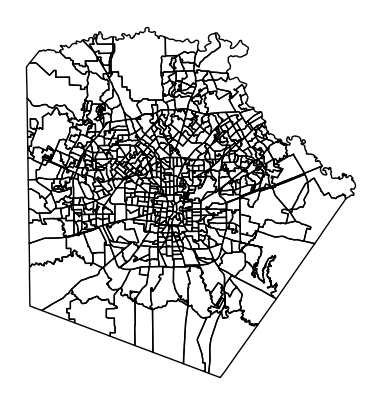

In [40]:
TLC_ax = (TLC_gdf.plot
      (figsize=(5,5),
       facecolor='none',
       edgecolor='black').
      set_axis_off())
TLC_ax

### Loading Census Bureau Data

#### States

In [99]:
CB_state_shapefiles_filepath = f'data/geospatial_files/shapefiles/census_bureau/states/tl_20{year}_us_state.shp'
CB_state_gdf = gpd.read_file(CB_state_shapefiles_filepath).set_crs(epsg=3395)

In [100]:
CB_state_gdf = CB_state_gdf[CB_state_gdf['STATEFP'] == '48']
CB_state_gdf.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
25,3,7,48,01779801,48,TX,Texas,00,G4000,A,676685555821,18974391187,+31.4347032,-099.2818238,"POLYGON ((-98.424 34.083, -98.422 34.083, -98...."


<Axes: >

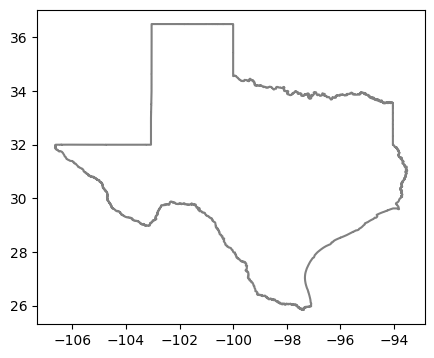

In [112]:
state_boundary_map = CB_state_gdf.boundary.plot(figsize=(5,5), color='Gray')
state_boundary_map

#### Block Groups

In [36]:
CB_block_group_shapefiles_filepath = f'data/geospatial_files/shapefiles/census_bureau/block_groups/20{year}/tl_20{year}_{state}_bg.shp'
CB_block_group_gdf = gpd.read_file(CB_block_group_shapefiles_filepath).set_crs(epsg=3395)

In [39]:
CB_block_group_gdf = CB_block_group_gdf[CB_block_group_gdf['COUNTYFP'] == '029']
CB_block_group_gdf.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
684,48,029,182003,1,480291820031,Block Group 1,G5030,S,5939086,3937,+29.5952357,-098.6387277,"POLYGON ((-98.653 29.593, -98.653 29.594, -98...."
1127,48,029,150700,2,480291507002,Block Group 2,G5030,S,354965,0,+29.3743544,-098.4910266,"POLYGON ((-98.494 29.377, -98.492 29.377, -98...."
1133,48,029,121606,3,480291216063,Block Group 3,G5030,S,586667,0,+29.5529878,-098.3363136,"POLYGON ((-98.341 29.554, -98.340 29.554, -98...."
1134,48,029,121604,2,480291216042,Block Group 2,G5030,S,1509863,7297,+29.5299609,-098.3136329,"POLYGON ((-98.329 29.537, -98.329 29.537, -98...."
1135,48,029,121604,3,480291216043,Block Group 3,G5030,S,401071,0,+29.5221084,-098.3162503,"POLYGON ((-98.321 29.524, -98.320 29.524, -98...."


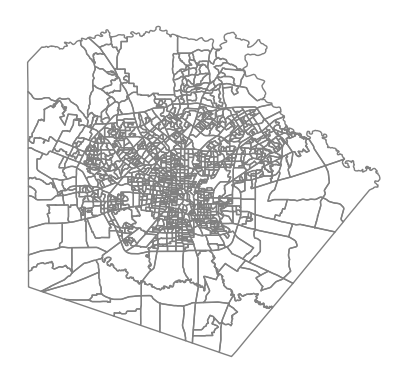

In [116]:
CB_block_group_ax = CB_block_group_gdf.boundary.plot(figsize=(5,5), color='Gray', linewidth=1).set_axis_off()
CB_block_group_ax

### Combining Overlays

In [86]:
for precinct in TLC_gdf.iterrows():
    precinct_gdf = gpd.GeoDataFrame(precinct[1])
    precinct_gdf = precinct_gdf.T
    precinct_gdf = precinct_gdf.set_geometry('geometry')
    precinct_gdf = precinct_gdf.set_crs(epsg=3395)
    # precinct_gdf = precinct_gdf.make_valid()
    # places_by_county_gdf = places_gdf.overlay(target_counties_gdf, how='intersection')
    # block_by_precinct = precinct_gdf.overlay(CB_block_group_gdf, how='union')
    # block_by_precinct = gpd.overlay(precinct_gdf, CB_block_group_gdf, how='intersection', keep_geom_type=True)
    break

# block_by_precinct
precinct_gdf

,CNTY,COLOR,VTD,CNTYKEY,VTDKEY,CNTYVTD,Shape_area,Shape_len,geometry
248,29,7,1002,15,252.0,291002,393145.319449,2767.912893,"POLYGON ((1127317.181 808422.762, 1127254.531 ..."


In [114]:
fig = CB_block_group_gdf.plot(ax=state_boundary_map, color='DarkGray')


<Figure size 640x480 with 0 Axes>

In [115]:
fig

<Axes: >

In [ ]:
ax = (gdf.plot(column='population_by_sex__estimate_total__K200101_001E',
                     legend=True,
                     cmap='Reds_r',
                     figsize=(10,10),
                     edgecolor='black').
      set_axis_off())
